Закрытые глаза

In [1]:
import os
import pandas as pd
from mne.io import read_raw_edf

# Путь к директории с данными
data_dir = '/home/belyaeva.a/пациенты и контроль/closed_eyes'

# Список для хранения данных
data_records = []

# Файл для записи ошибок
error_log_file = "error_files.txt"
with open(error_log_file, "w") as error_file:
    error_file.write("Файлы с ошибками при обработке:\n")

# Обход папок и файлов
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    
    if os.path.isdir(folder_path):  # Проверяем, что это папка
        for file_name in os.listdir(folder_path):
            if file_name.endswith(".edf"):  # Проверяем, что это файл формата EDF
                file_path = os.path.join(folder_path, file_name)
                
                try:
                    # Загружаем данные из EDF файла
                    raw = read_raw_edf(file_path, preload=True, verbose=False)
                    
                    # Извлекаем сигналы и метаданные каналов
                    signals = raw.get_data()  # Массив данных: shape (n_channels, n_times)
                    channel_names = raw.info['ch_names']  # Имена каналов
                    
                    # Преобразуем данные каналов в словарь для удобства
                    channel_data = {name: signals[i, :].tolist() for i, name in enumerate(channel_names)}
                    
                    # Добавляем запись в DataFrame
                    data_records.append({
                        "patient_id": file_name.replace(".edf", ""),  # ID пациента по имени файла
                        "label": folder_name,  # Метка из имени папки
                        "file_path": file_path,  # Полный путь к файлу
                        "sfreq": raw.info['sfreq'],  # Частота дискретизации
                        "duration_sec": raw.n_times / raw.info['sfreq'],  # Длительность записи
                        "n_channels": len(channel_names),  # Количество каналов
                        "channels": channel_data  # Данные каналов
                    })
                except Exception as e:
                    # Логируем ошибку в файл
                    with open(error_log_file, "a") as error_file:
                        error_file.write(f"{file_path}: {e}\n")
                    print(f"Ошибка при обработке файла {file_path}: {e}")

# Создаем DataFrame
df = pd.DataFrame(data_records)

# Выводим DataFrame
print(df.head())

# Сообщение о завершении
print(f"Обработка завершена. Файлы с ошибками записаны в {error_log_file}.")


/tmp/ipykernel_1288010/2853466891.py:27: RuntimeWarning: Physical range is not defined in following channels:
event
  raw = read_raw_edf(file_path, preload=True, verbose=False)
/tmp/ipykernel_1288010/2853466891.py:27: RuntimeWarning: Physical range is not defined in following channels:
event
  raw = read_raw_edf(file_path, preload=True, verbose=False)
/tmp/ipykernel_1288010/2853466891.py:27: RuntimeWarning: Physical range is not defined in following channels:
event
  raw = read_raw_edf(file_path, preload=True, verbose=False)
/tmp/ipykernel_1288010/2853466891.py:27: RuntimeWarning: Physical range is not defined in following channels:
event
  raw = read_raw_edf(file_path, preload=True, verbose=False)
/tmp/ipykernel_1288010/2853466891.py:27: RuntimeWarning: Physical range is not defined in following channels:
event
  raw = read_raw_edf(file_path, preload=True, verbose=False)
/tmp/ipykernel_1288010/2853466891.py:27: RuntimeWarning: Physical range is not defined in following channels:
event

                        patient_id label  \
0            ФРИМУЧКОВ_26_f42-2_ЗГ   ОКР   
1       Mereckovski_AA_32_f42-1_zg   ОКР   
2           карпова_аа_32_f42-1_зг   ОКР   
3  чеберидзе геннадий_49_f42-1_zg   ОКР   
4            omarov_iU_25_f42-1_zg   ОКР   

                                           file_path  sfreq  duration_sec  \
0  /home/belyaeva.a/пациенты и контроль/closed_ey...  250.0          80.0   
1  /home/belyaeva.a/пациенты и контроль/closed_ey...  250.0          92.0   
2  /home/belyaeva.a/пациенты и контроль/closed_ey...  250.0          82.0   
3  /home/belyaeva.a/пациенты и контроль/closed_ey...  250.0          64.0   
4  /home/belyaeva.a/пациенты и контроль/closed_ey...  250.0         166.0   

   n_channels                                           channels  
0          19  {'Fp1': [-4.362146562905349e-07, -1.2911029831...  
1          20  {'Fp1': [-1.7438430991073471e-06, 7.5209143968...  
2          19  {'Fp1': [7.26011325551232e-06, 2.4480775097276...  
3   

/tmp/ipykernel_1288010/2853466891.py:27: RuntimeWarning: Physical range is not defined in following channels:
event
  raw = read_raw_edf(file_path, preload=True, verbose=False)
/tmp/ipykernel_1288010/2853466891.py:27: RuntimeWarning: Physical range is not defined in following channels:
event
  raw = read_raw_edf(file_path, preload=True, verbose=False)
/tmp/ipykernel_1288010/2853466891.py:27: RuntimeWarning: Physical range is not defined in following channels:
event
  raw = read_raw_edf(file_path, preload=True, verbose=False)
/tmp/ipykernel_1288010/2853466891.py:27: RuntimeWarning: Physical range is not defined in following channels:
event
  raw = read_raw_edf(file_path, preload=True, verbose=False)
/tmp/ipykernel_1288010/2853466891.py:27: RuntimeWarning: Physical range is not defined in following channels:
event
  raw = read_raw_edf(file_path, preload=True, verbose=False)
/tmp/ipykernel_1288010/2853466891.py:27: RuntimeWarning: Physical range is not defined in following channels:
event

In [2]:
df

,patient_id,label,file_path,sfreq,duration_sec,n_channels,channels
0,ФРИМУЧКОВ_26_f42-2_ЗГ,ОКР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,80.0,19,"{'Fp1': [-4.362146562905349e-07, -1.2911029831..."
1,Mereckovski_AA_32_f42-1_zg,ОКР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,92.0,20,"{'Fp1': [-1.7438430991073471e-06, 7.5209143968..."
2,карпова_аа_32_f42-1_зг,ОКР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,82.0,19,"{'Fp1': [7.26011325551232e-06, 2.4480775097276..."
3,чеберидзе геннадий_49_f42-1_zg,ОКР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,64.0,20,"{'Fp1': [-9.629464652475805e-07, -3.1048251560..."
4,omarov_iU_25_f42-1_zg,ОКР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,166.0,19,"{'Fp1': [-3.2241381261921136e-06, 1.0986337239..."
...,...,...,...,...,...,...,...
150,GuTR_m20_f45-3_As_No_Ne_zg,ПТСР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,45.0,21,"{'EEG Fp1-A1': [4.7248578622110533e-07, -2.814..."
151,DeSV_m28_f06-2_f_28_Ng_P_zg,ПТСР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,46.0,21,"{'EEG Fp1-A1': [6.734983596551433e-07, -9.4254..."
152,StDF_m28_f45-2_T_At_Ne_zg,ПТСР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,45.0,21,"{'EEG Fp1-A1': [6.495127669184405e-06, 7.68165..."
153,TeEA_f89_F40-9_f06-4_Nk_Nt_zg,ПТСР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,46.0,21,"{'Fp1-A1': [8.931867246509155e-08, -1.52843447..."


In [3]:
expanded_channels = pd.DataFrame(df['channels'].tolist())
df = pd.concat([df.drop(columns=['channels']), expanded_channels], axis=1)

# Теперь у вас есть отдельные столбцы для каждого канала
print(df.head())

                        patient_id label  \
0            ФРИМУЧКОВ_26_f42-2_ЗГ   ОКР   
1       Mereckovski_AA_32_f42-1_zg   ОКР   
2           карпова_аа_32_f42-1_зг   ОКР   
3  чеберидзе геннадий_49_f42-1_zg   ОКР   
4            omarov_iU_25_f42-1_zg   ОКР   

                                           file_path  sfreq  duration_sec  \
0  /home/belyaeva.a/пациенты и контроль/closed_ey...  250.0          80.0   
1  /home/belyaeva.a/пациенты и контроль/closed_ey...  250.0          92.0   
2  /home/belyaeva.a/пациенты и контроль/closed_ey...  250.0          82.0   
3  /home/belyaeva.a/пациенты и контроль/closed_ey...  250.0          64.0   
4  /home/belyaeva.a/пациенты и контроль/closed_ey...  250.0         166.0   

   n_channels                                                Fp1  \
0          19  [-4.362146562905349e-07, -1.2911029831387842e-...   
1          20  [-1.7438430991073471e-06, 7.520914396887166e-0...   
2          19  [7.26011325551232e-06, 2.4480775097276254e-06,...   


In [4]:
df

,patient_id,label,file_path,sfreq,duration_sec,n_channels,Fp1,Fp2,F7,F3,...,EEG O2-A1,EEG A2-A1,EEG A1-N,EEG T6-A1,EEG Fp1-A1(1),EEG Fpz-A0,EEG Fz-A0,EEG Cz-A0,EEG Pz-A0,EEG A1-A2
0,ФРИМУЧКОВ_26_f42-2_ЗГ,ОКР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,80.0,19,"[-4.362146562905349e-07, -1.2911029831387842e-...","[3.919777523460752e-06, 3.3637846646829992e-06...","[-5.740975403982606e-06, -5.131873064774549e-0...","[-7.820410620279301e-07, -2.3945388113222003e-...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mereckovski_AA_32_f42-1_zg,ОКР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,92.0,20,"[-1.7438430991073471e-06, 7.520914396887166e-0...","[-4.219503186083774e-06, -3.878030977340354e-0...","[-4.131420033569847e-06, -9.4780252979324e-06,...","[-7.083070518043793e-06, -1.157184865491722e-0...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,карпова_аа_32_f42-1_зг,ОКР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,82.0,19,"[7.26011325551232e-06, 2.4480775097276254e-06,...","[5.313640000000001e-05, 7.3259100297550954e-06...","[8.09658119325551e-06, -2.4037557457846956e-06...","[7.2901283604180966e-06, -1.608265674830243e-0...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,чеберидзе геннадий_49_f42-1_zg,ОКР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,64.0,20,"[-9.629464652475805e-07, -3.1048251560235015e-...","[2.681858579385039e-07, -1.7684974944686065e-0...","[-8.663954131380149e-07, -2.8170740611886752e-...","[1.142464776073855e-06, -2.2196945601586824e-0...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,omarov_iU_25_f42-1_zg,ОКР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,166.0,19,"[-3.2241381261921136e-06, 1.0986337239642915e-...","[-4.157463973449301e-06, 8.658396002136267e-07...","[-1.9906069535362762e-06, 1.983627891966128e-0...","[-3.7723146257724876e-06, -3.8521322194247353e...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,GuTR_m20_f45-3_As_No_Ne_zg,ПТСР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,45.0,21,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,DeSV_m28_f06-2_f_28_Ng_P_zg,ПТСР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,46.0,21,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,StDF_m28_f45-2_T_At_Ne_zg,ПТСР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,45.0,21,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,TeEA_f89_F40-9_f06-4_Nk_Nt_zg,ПТСР,/home/belyaeva.a/пациенты и контроль/closed_ey...,250.0,46.0,21,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['patient_id', 'label', 'file_path', 'sfreq', 'duration_sec',
       'n_channels', 'Fp1', 'Fp2', 'F7', 'F3',
       ...
       'EEG O2-A1', 'EEG A2-A1', 'EEG A1-N', 'EEG T6-A1', 'EEG Fp1-A1(1)',
       'EEG Fpz-A0', 'EEG Fz-A0', 'EEG Cz-A0', 'EEG Pz-A0', 'EEG A1-A2'],
      dtype='object', length=121)

In [6]:
output_file = "columns_old.csv"

# Сохранение названий столбцов в CSV
pd.DataFrame(df.columns, columns=["Column Names"]).to_csv(output_file, index=False)

In [7]:
unique_labels = df['label'].unique()
print(unique_labels)


['ОКР' 'тревожно-фобические' 'ПРЛ' 'control' 'ПТСР']


In [8]:
# List of required channels
required_channels = ['C3', 'C4', 'Cz', 'F3', 'F4', 'F7', 'F8', 'Fp2', 'Fz', 'P3', 'P4', 'Pz', 'T3', 'T4']

# Filter rows where all required channels are not NaN
filtered_df = df.dropna(subset=required_channels)

# Select one example per label
examples_by_label = filtered_df.groupby('label').first().reset_index()

# Display the results
print(f"Selected examples for each label:")
print(examples_by_label[['patient_id', 'label']])


Selected examples for each label:
                           patient_id                label
0                   AtAs_m27_contr_zg              control
1               ФРИМУЧКОВ_26_f42-2_ЗГ                  ОКР
2    PoIP_f22_f60-3_f41-2_Na_As_Ep_zg                  ПРЛ
3  BeAn_f25_f32-1_f41-2_Nk_Ep_At_zg 2  тревожно-фобические


In [9]:
import mne
import os

# Define the path to your data folder
data_dir = "/home/belyaeva.a/пациенты и контроль/closed_eyes"

# Selected examples with their labels
examples = [
    {"patient_id": "AtAs_m27_contr_zg", "label": "control"},
    {"patient_id": "ФРИМУЧКОВ_26_f42-2_ЗГ", "label": "ОКР"},
    {"patient_id": "PoIP_f22_f60-3_f41-2_Na_As_Ep_zg", "label": "ПРЛ"},
    {"patient_id": "BeAn_f25_f32-1_f41-2_Nk_Ep_At_zg", "label": "тревожно-фобические"}
]

# Define the 10-20 Electrode System
channels_to_use = [
    'Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 
    'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2'
]

# Convert channels_to_use to lowercase for consistency
channels_to_use = [ch.lower() for ch in channels_to_use]

# Function to process each EDF file
def process_edf(patient_id, label):
    file_path = os.path.join(data_dir, label, f"{patient_id}.edf")
    try:
        # Load the EDF file
        raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)

        # Step 1: Standardize channel names
        raw.rename_channels({ch: ch.replace(".", "").lower() for ch in raw.ch_names})

        # Step 2: Print available channels for debugging
        print(f"Available channels in {patient_id}: {raw.ch_names}")

        # Step 3: Get the 10-20 montage
        ten_twenty_montage = mne.channels.make_standard_montage("standard_1020")

        # Step 4: Find matching channels
        matching_channels = [ch for ch in channels_to_use if ch in raw.ch_names]
        if not matching_channels:
            print(f"No matching channels found for {patient_id}. Skipping...")
            return None

        # Step 5: Pick only matching channels
        raw.pick_channels(matching_channels)

        # Step 6: Apply the montage with on_missing="ignore"
        raw.set_montage(ten_twenty_montage, on_missing="ignore")

        # Verify the montage has been set correctly
        print(f"Processed {patient_id} ({label}):")
        print(raw.info)

        return raw

    except Exception as e:
        print(f"Error processing {patient_id} ({label}): {e}")
        return None

# Process all examples
processed_samples = []
for example in examples:
    raw_data = process_edf(example["patient_id"], example["label"])
    if raw_data:
        processed_samples.append(raw_data)


Available channels in AtAs_m27_contr_zg: ['fp1', 'fp2', 'f3', 'fz', 'f4', 'f7', 'f8', 't3', 't4', 'c3', 'cz', 'c4', 't5', 't6', 'p3', 'pz', 'p4', 'o1', 'o2', 'event', 'status']
Processed AtAs_m27_contr_zg (control):
<Info | 8 non-empty values
 bads: []
 ch_names: fp1, fp2, f3, fz, f4, f7, f8, t3, t4, c3, cz, c4, t5, t6, p3, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 3 items (3 Cardinal)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2024-10-19 10:19:17 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
>
Available channels in ФРИМУЧКОВ_26_f42-2_ЗГ: ['fp1', 'fp2', 'f7', 'f3', 'fz', 'f4', 'f8', 't3', 'c3', 'cz', 'c4', 't4', 't5', 'p3', 'pz', 'p4', 't6', 'o1', 'o2']
Processed ФРИМУЧКОВ_26_f42-2_ЗГ (ОКР):
<Info | 8 non-empty values
 bads: []
 ch_names: fp1, fp2, f7, f3, fz, f4, f8, t3, c3, cz, c4, t4, t5, p3, pz, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 3 items (3 Cardinal)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2024-05-06 14:27:14 UTC
 nchan: 19
 projs: []
 sfreq: 250.

/tmp/ipykernel_1288010/327389537.py:29: RuntimeWarning: Physical range is not defined in following channels:
event
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)


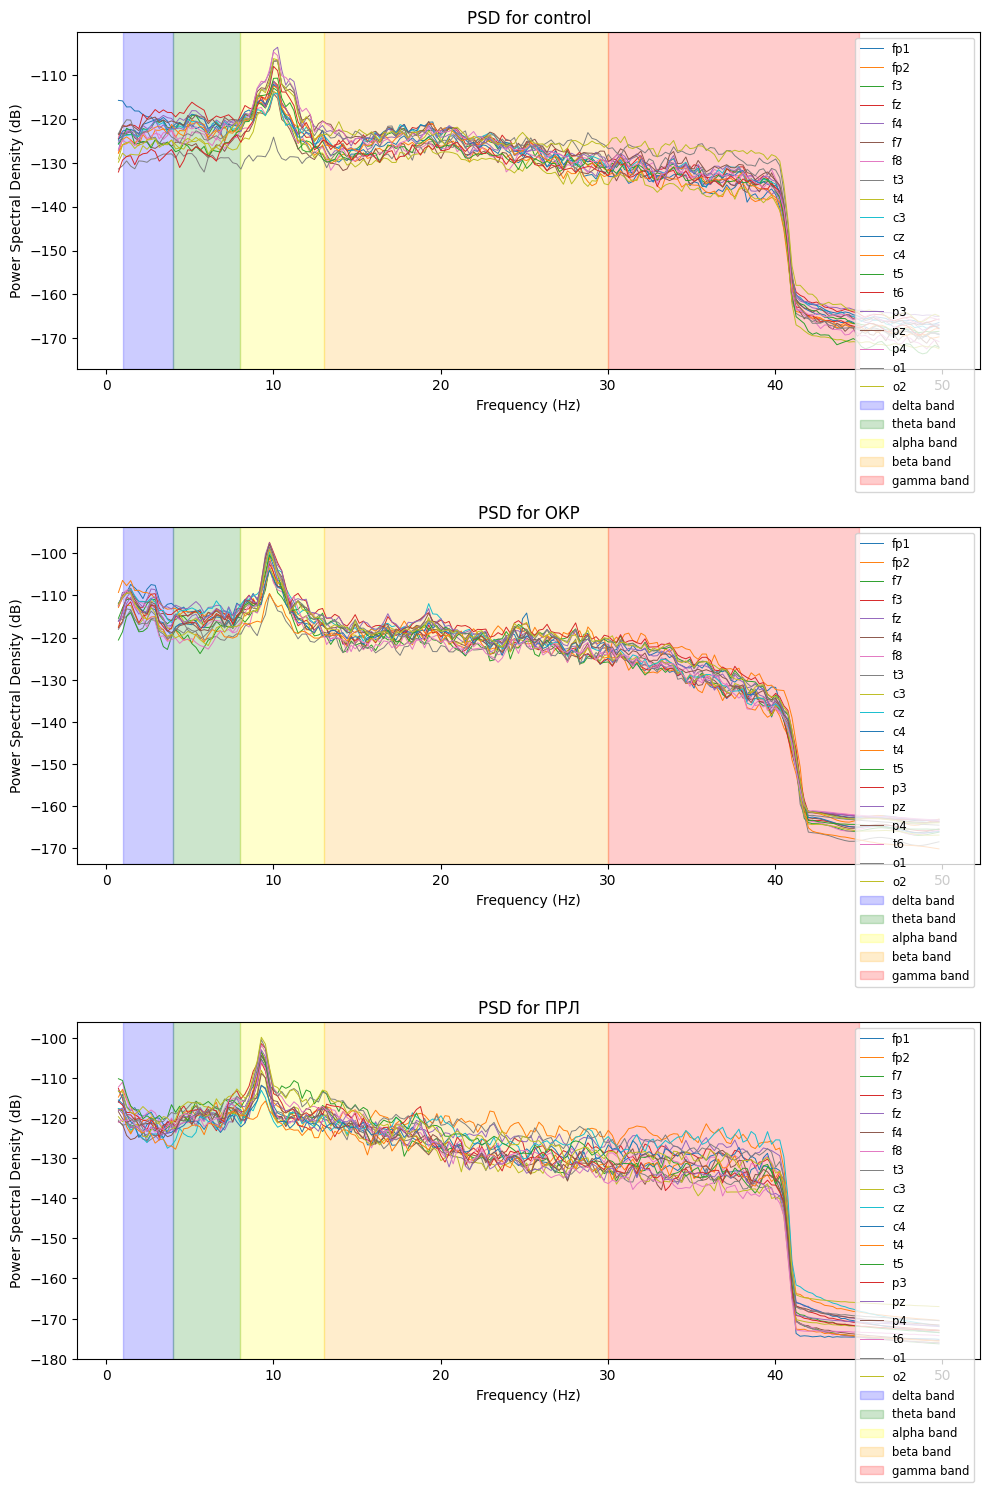

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define frequency bands with corresponding colors
bands = {
    "delta": (1, 4, "blue"),
    "theta": (4, 8, "green"),
    "alpha": (8, 13, "yellow"),
    "beta": (13, 30, "orange"),
    "gamma": (30, 45, "red")
}

# Function to plot PSD for a given raw object
def plot_psd_by_label(raw, label, bands, ax=None):
    """
    Plot the PSD for the given raw object and label.

    Parameters:
    - raw: MNE Raw object
    - label: Label of the subject (e.g., "ОКР")
    - bands: Dictionary of frequency bands
    - ax: Matplotlib axis (optional)
    """
    psds, freqs = mne.time_frequency.psd_welch(raw, fmin=0.5, fmax=50, n_fft=1024, verbose=False)
    psds = 10 * np.log10(psds)  # Convert to dB

    if ax is None:
        ax = plt.gca()
    
    # Plot the PSD for each channel
    for idx, ch_name in enumerate(raw.ch_names):
        ax.plot(freqs, psds[idx], label=ch_name, linewidth=0.7)

    # Highlight frequency bands with different colors
    for band, (low, high, color) in bands.items():
        ax.axvspan(low, high, color=color, alpha=0.2, label=f"{band} band")

    ax.set_title(f"PSD for {label}")
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Power Spectral Density (dB)")
    ax.legend(loc="upper right", fontsize="small")

# Visualize PSDs for each label
fig, axs = plt.subplots(len(processed_samples), 1, figsize=(10, 5 * len(processed_samples)))

for i, raw in enumerate(processed_samples):
    label = examples[i]["label"]  # Retrieve the label
    plot_psd_by_label(raw, label, bands, ax=axs[i])

plt.tight_layout()
plt.show()



In [11]:
import pandas as pd
import numpy as np

# Функция для переименования
def extract_channel_name(column_name):
    if '-' in column_name:
        return column_name.split('-')[0].split()[-1]
    return column_name

# Переименовываем столбцы
new_columns = {col: extract_channel_name(col) for col in df.columns}
df.rename(columns=new_columns, inplace=True)

# Группировка и схлопывание методом first()
df = df.groupby(axis=1, level=0).first()

print(df)


       A1    A2                                                 C3  \
0    None  None  [-1.9154876707103037e-06, -4.4810515983825406e...   
1    None  None  [1.3138368963149478e-06, 2.412628992141605e-06...   
2    None  None  [2.90202e-05, -2.060308992141602e-06, -4.18036...   
3    None  None  [-1.5482699931334442e-07, -2.6901558678568706e...   
4    None  None  [-4.721596081483172e-06, -2.1606062119478086e-...   
..    ...   ...                                                ...   
150  None  None  [1.912737337300678e-06, -2.788127055771726e-06...   
151  None  None  [7.147892317082474e-07, 8.378449485008009e-07,...   
152  None  None  [4.2314011673151746e-06, 7.06177326161593e-06,...   
153  None  None  [4.912526985580221e-06, 3.0026099519340775e-06...   
154  None  None  [3.4759428610666035e-06, 2.99539459372854e-06,...   

                                                    C4  \
0    [2.8081960997939985e-06, 2.359318974593724e-06...   
1    [-2.4308663813229586e-06, -2.790143787

/tmp/ipykernel_1288010/3522021166.py:15: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df = df.groupby(axis=1, level=0).first()


In [12]:
df.columns

Index(['A1', 'A2', 'C3', 'C4', 'Cz', 'ECG Ref', 'F3', 'F4', 'F7', 'F8', 'Fp1',
       'Fp2', 'Fpz', 'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'Status', 'T3', 'T4',
       'T5', 'T6', 'duration_sec', 'event', 'file_path', 'label', 'n_channels',
       'patient_id', 'sfreq'],
      dtype='object')

In [13]:
output_file = "columns_new.csv"

# Сохранение названий столбцов в CSV
pd.DataFrame(df.columns, columns=["Column Names"]).to_csv(output_file, index=False)

In [14]:
nan_columns = df.columns[df.isna().all()].tolist()
print("Столбцы, полностью состоящие из NaN:")
print(nan_columns)

Столбцы, полностью состоящие из NaN:
[]


In [15]:
import numpy as np
from itertools import chain, combinations
import pandas as pd

# Функция для получения всех подмножеств каналов
def get_all_subsets(channels):
    """
    Генерирует все подмножества для списка каналов.

    Parameters:
    - channels (list): Список каналов.

    Returns:
    - итератор, содержащий все подмножества каналов.
    """
    return chain.from_iterable(combinations(channels, r) for r in range(1, len(channels) + 1))

# Указанные столбцы (каналы)
channels = ['A1', 'A2', 'C3', 'C4', 'Cz', 'F3', 'F4', 'F7', 'F8', 'Fp1', 'Fp2',
            'Fpz', 'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']

# Бинарная матрица пропусков
non_na_matrix = df[channels].notna().values

# Подсчёт количества строк для каждого подмножества
max_rows = 0
best_subset = None

for subset in get_all_subsets(channels):
    subset_idx = [channels.index(ch) for ch in subset]
    rows_with_data = non_na_matrix[:, subset_idx].all(axis=1).sum()
    if rows_with_data > max_rows or (rows_with_data == max_rows and len(subset) > len(best_subset or [])):
        max_rows = rows_with_data
        best_subset = subset

# Получение строк без NaN для лучшего подмножества каналов
subset_idx = [channels.index(ch) for ch in best_subset]
rows_with_data_mask = non_na_matrix[:, subset_idx].all(axis=1)
relevant_patient_ids = df.loc[rows_with_data_mask, 'patient_id']

print(f"Наилучшее подмножество каналов: {best_subset}")
print(f"Количество строк без NaN в этом подмножестве: {max_rows}")
print(f"Соответствующие patient_id: {relevant_patient_ids.tolist()}")


Наилучшее подмножество каналов: ('C3', 'C4', 'Cz', 'F3', 'F4', 'F7', 'F8', 'Fp2', 'Fz', 'P3', 'P4', 'Pz', 'T3', 'T4')
Количество строк без NaN в этом подмножестве: 155
Соответствующие patient_id: ['ФРИМУЧКОВ_26_f42-2_ЗГ', 'Mereckovski_AA_32_f42-1_zg', 'карпова_аа_32_f42-1_зг', 'чеберидзе геннадий_49_f42-1_zg', 'omarov_iU_25_f42-1_zg', 'Сугробова_АА_43_f42-1_zg', 'Инга_18_f42-2_ЗГ', 'поддубко сергей_35_f42-1_зг', 'Korkin_Vlad_24_f42-2_zg', 'Koptev_34_f42-1_zg', 'козлов_еи_28_f42-0_зг', 'GoAV_m39_f42-8_zg', 'svetlana_35_f42-0_zg', 'сергеечев сс 30_f42-0_зг', 'Короленко_ЮВ_30_f42-1_zg', 'kopytin_vv_30_f42-0_zg', 'Хромых Григорий_24_f42-1_zg', 'Ангелина_40_f42-1_zg', 'Balashova_UE_39_f42-1_zg', 'волынова_илона_36_f42-1_zg', 'Anastasia_23_f42-1_zg', 'Бондарь_вячеслав_33_f42-1_zg', 'митрошин_тм_18_f42-2_зг', 'науменко александра_f42-2_21_зг', 'Гришко_олег_28_f42-1_zg', 'чистов игорь_23_f42-1_зг', 'Belkin Alex_20_f42-2_ЗГ', 'уточкина ирина_27_f42-1_зг', 'GaAP_m19_f60-3_f42-8_f32-1_f45-2_Nr

In [16]:
import numpy as np
from itertools import chain, combinations
import pandas as pd

# Функция для получения всех подмножеств каналов
def get_all_subsets(channels):
    """
    Генерирует все подмножества для списка каналов.

    Parameters:
    - channels (list): Список каналов.

    Returns:
    - итератор, содержащий все подмножества каналов.
    """
    return chain.from_iterable(combinations(channels, r) for r in range(1, len(channels) + 1))

# Указанные столбцы (каналы)
channels = ['A1', 'A2', 'C3', 'C4', 'Cz', 'F3', 'F4', 'F7', 'F8', 'Fp1', 'Fp2',
            'Fpz', 'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']

# Бинарная матрица пропусков
non_na_matrix = df[channels].notna().values

# Подсчёт количества каналов для каждого подмножества
max_channels = 0
best_subset = None

for subset in get_all_subsets(channels):
    subset_idx = [channels.index(ch) for ch in subset]
    # Проверяем, есть ли строки, где все значения в подмножестве не NaN
    if non_na_matrix[:, subset_idx].all(axis=1).all():  # Проверяет, что все строки не содержат NaN
        if len(subset) > max_channels:
            max_channels = len(subset)
            best_subset = subset

# Получение строк без NaN для лучшего подмножества каналов
subset_idx = [channels.index(ch) for ch in best_subset]
rows_with_data_mask = non_na_matrix[:, subset_idx].all(axis=1)
relevant_patient_ids = df.loc[rows_with_data_mask, 'patient_id']

print(f"Наилучшее подмножество каналов с максимальным количеством каналов: {best_subset}")
print(f"Количество строк без NaN в этом подмножестве: {rows_with_data_mask.sum()}")
print(f"Соответствующие patient_id: {relevant_patient_ids.tolist()}")


Наилучшее подмножество каналов с максимальным количеством каналов: ('C3', 'C4', 'Cz', 'F3', 'F4', 'F7', 'F8', 'Fp2', 'Fz', 'P3', 'P4', 'Pz', 'T3', 'T4')
Количество строк без NaN в этом подмножестве: 155
Соответствующие patient_id: ['ФРИМУЧКОВ_26_f42-2_ЗГ', 'Mereckovski_AA_32_f42-1_zg', 'карпова_аа_32_f42-1_зг', 'чеберидзе геннадий_49_f42-1_zg', 'omarov_iU_25_f42-1_zg', 'Сугробова_АА_43_f42-1_zg', 'Инга_18_f42-2_ЗГ', 'поддубко сергей_35_f42-1_зг', 'Korkin_Vlad_24_f42-2_zg', 'Koptev_34_f42-1_zg', 'козлов_еи_28_f42-0_зг', 'GoAV_m39_f42-8_zg', 'svetlana_35_f42-0_zg', 'сергеечев сс 30_f42-0_зг', 'Короленко_ЮВ_30_f42-1_zg', 'kopytin_vv_30_f42-0_zg', 'Хромых Григорий_24_f42-1_zg', 'Ангелина_40_f42-1_zg', 'Balashova_UE_39_f42-1_zg', 'волынова_илона_36_f42-1_zg', 'Anastasia_23_f42-1_zg', 'Бондарь_вячеслав_33_f42-1_zg', 'митрошин_тм_18_f42-2_зг', 'науменко александра_f42-2_21_зг', 'Гришко_олег_28_f42-1_zg', 'чистов игорь_23_f42-1_зг', 'Belkin Alex_20_f42-2_ЗГ', 'уточкина ирина_27_f42-1_зг', '

In [17]:
import pandas as pd

channels_ = [ 'C3', 'C4', 'Cz', 'F3', 'F4', 'F7', 'F8', 'Fp1', 'Fp2',
             'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']

# Проверка на строки без NaN в указанных столбцах
valid_rows_mask = df[channels_].notna().all(axis=1)

# Вывод индексов строк, полностью заполненных в указанных столбцах
valid_row_indices = valid_rows_mask[valid_rows_mask].index

# Печать индексов строк
print(f"Индексы строк, полностью заполненных в указанных столбцах: {list(valid_row_indices)}")

# Вывод строк, полностью заполненных
complete_rows = df.loc[valid_rows_mask]
print(f"Строки, полностью заполненные в указанных столбцах:\n{complete_rows}")

# List of required channels
required_channels = ['C3', 'C4', 'Cz', 'F3', 'F4', 'F7', 'F8', 'Fp2', 'Fz', 'P3', 'P4', 'Pz', 'T3', 'T4']

# Filter rows where all required channels are not NaN
filtered_df = df.dropna(subset=required_channels)

# Select one example per label
examples_by_label = filtered_df.groupby('label').first().reset_index()

# Display the results
print(f"Selected examples for each label:")
print(examples_by_label[['patient_id', 'label']])


Индексы строк, полностью заполненных в указанных столбцах: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]
Строки, полностью заполненные в указанных столбцах:
       A1    A2                                                 C3  \
0    None  None  [-1.9154876707103037e-06, -4.4810515983825406e...   
1    None  None  [1.3138368963149478e-06, 2.412628992141605e-06...   
2    None  None  [2.90202e-0

In [18]:
band_bounds = {
    'theta': [4, 8],
    'alpha': [8, 13],
    'beta': [13, 30],
    'gamma': [30, 45]
}


In [19]:
from scipy import signal

def get_filter(sfreq=125., band='alpha'):
    """
    Generate a FIR filter for the specified frequency band.

    Parameters:
    - sfreq (float): Sampling frequency of the signal.
    - band (str): Frequency band name as defined in band_bounds.

    Returns:
    - filt (numpy array): FIR filter coefficients.
    """
    # Validate if the band exists in band_bounds
    if band not in band_bounds:
        raise ValueError(f"Band '{band}' is not defined in band_bounds.")

    # Extract band bounds
    f_low = band_bounds[band][0]
    f_high = band_bounds[band][1]

    # Define filter transition regions (add a margin for smoothness)
    f_low_lb = max(0, f_low - 1)  # Ensure frequencies are non-negative
    f_low_ub = f_low
    f_high_lb = f_high
    f_high_ub = f_high + 1

    nyq = sfreq / 2.  # The Nyquist frequency (half the sampling rate)

    # Define frequency and gain profiles for the FIR filter
    freq = [0., f_low_lb, f_low_ub, f_high_lb, f_high_ub, nyq]
    gain = [0, 0, 1, 1, 0, 0]

    # Length of the filter (1 second worth of samples)
    n = int(round(sfreq)) + 1  # Ensures odd filter length for zero-phase filtering

    # Generate FIR filter coefficients
    filt = signal.firwin2(n, freq, gain, nyq=nyq)

    return filt


In [20]:
import numpy as np
import pandas as pd
from scipy.signal import welch, hilbert
from scipy.stats import pearsonr, entropy
from mne.connectivity import spectral_connectivity
from mne.time_frequency import psd_array_welch
from scipy import signal
from itertools import combinations
from joblib import Parallel, delayed
from scipy.linalg import svd
import antropy as ant
from nolds import dfa, lyap_r, hurst_rs
import random

random.seed(42)
np.random.seed(42)

# Precompute filters for each band
filters = {band: signal.firwin2(
    numtaps=int(round(125)) + 1,
    freq=[0, max(0, low - 1), low, high, high + 1, 125 / 2],
    gain=[0, 0, 1, 1, 0, 0],
    nyq=125 / 2
) for band, (low, high) in band_bounds.items()}


def compute_band_power(signal_array, sfreq, band_bounds):
    """Compute power for all bands in a single pass."""
    freqs, psd = welch(signal_array, fs=sfreq, nperseg=min(256, len(signal_array)))
    total_power = psd.sum()
    band_powers = {band: psd[(freqs >= low) & (freqs <= high)].sum() / total_power
                   for band, (low, high) in band_bounds.items()}
    return band_powers


def compute_envelope_features(signal_array, filt, band):
    """Compute envelope standard deviation and correlation."""
    filtered_signal = np.convolve(filt, signal_array, 'valid')
    envelope = np.abs(hilbert(filtered_signal))
    std_ratio = envelope.std() / envelope.mean() if envelope.mean() > 0 else 0
    return std_ratio, envelope


def compute_non_linear_features(signal_array, sfreq):
    """Compute non-linear features for the signal."""
    sanitized_signal = np.array(signal_array, dtype=np.float64)
    sanitized_signal = sanitized_signal[np.isfinite(sanitized_signal)]  # Remove NaN/Inf
    if len(sanitized_signal) < 10:
        return {key: np.nan for key in [
            'approx_entropy', 'sample_entropy', 'spectral_entropy', 'higuchi_fd',
            'dfa', 'hurst_exp', 'diagonal_entropy', 'fisher_info'
        ]}

    non_linear_feats = {}

    # (a) Entropy measures
    non_linear_feats['approx_entropy'] = ant.app_entropy(sanitized_signal)
    non_linear_feats['sample_entropy'] = ant.sample_entropy(sanitized_signal)
    non_linear_feats['spectral_entropy'] = ant.spectral_entropy(sanitized_signal, sfreq, method='welch')

    # (b) Fractal dimensions
    non_linear_feats['higuchi_fd'] = ant.higuchi_fd(sanitized_signal)

    # (c) DFA (Detrended Fluctuation Analysis)
    non_linear_feats['dfa'] = dfa(sanitized_signal)


    # (e) Hurst exponent
    non_linear_feats['hurst_exp'] = hurst_rs(sanitized_signal)

    # (g) Recurrence analysis features
    recurrence_matrix = np.abs(sanitized_signal[:, None] - sanitized_signal) < 0.1  # Threshold example
    diagonal_lengths = [np.sum(np.diag(recurrence_matrix, k)) for k in range(-len(sanitized_signal), len(sanitized_signal))]
    non_linear_feats['diagonal_entropy'] = entropy(diagonal_lengths)

    # (h) Chaos measures
    non_linear_feats['fisher_info'] = np.var(sanitized_signal) / np.mean(sanitized_signal**2)

    return non_linear_feats

def extract_features(row, channels, sfreq):
    """Extract features for a single row."""
    feats = {'patient_id': row['patient_id'], 'label': row['label']}
    channel_data = {ch: row[ch] for ch in channels if isinstance(row[ch], list) and len(row[ch]) > 0}
    channel_signals = np.array(list(channel_data.values()))

    # Compute band power
    for idx, channel in enumerate(channel_data):
        band_powers = compute_band_power(channel_signals[idx], sfreq, band_bounds)
        for band, power in band_powers.items():
            feats[f'{channel}_{band}_power'] = power

    # Compute envelope features
    for band, filt in filters.items():
        envelopes = []
        for idx, signal_array in enumerate(channel_signals):
            std_ratio, envelope = compute_envelope_features(signal_array, filt, band)
            feats[f'{list(channel_data.keys())[idx]}_env_std_{band}'] = std_ratio
            envelopes.append(envelope)

        # Compute envelope correlations
        for i, j in combinations(range(len(envelopes)), 2):
            ch1 = list(channel_data.keys())[i]
            ch2 = list(channel_data.keys())[j]
            feats[f'env_corr_{ch1}_{ch2}_{band}'] = pearsonr(envelopes[i], envelopes[j])[0]

    # Compute non-linear features
    for idx, signal_array in enumerate(channel_signals):
        non_linear_feats = compute_non_linear_features(signal_array, sfreq)
        for feat_name, feat_value in non_linear_feats.items():
            feats[f'{list(channel_data.keys())[idx]}_{feat_name}'] = feat_value

    return feats

# Extract features for all rows in parallel
channels = ['C3', 'C4', 'Cz', 'F3', 'F4', 'F7', 'F8', 'Fp2', 'Fz', 'P3', 'P4', 'Pz', 'T3', 'T4']
sfreq = 125.  # Replace with actual sampling frequency if variable
all_feats = Parallel(n_jobs=-1)(delayed(extract_features)(row, channels, sfreq) for _, row in df.iterrows())

# Create a DataFrame with extracted features
feats_df = pd.DataFrame(all_feats)




/home/belyaeva.a/venv_new/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/belyaeva.a/venv_new/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/belyaeva.a/venv_new/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/belyaeva.a/venv_new/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/belyaeva.a/venv_new/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 scor

In [21]:
feats_df

,patient_id,label,C3_theta_power,C3_alpha_power,C3_beta_power,C3_gamma_power,C4_theta_power,C4_alpha_power,C4_beta_power,C4_gamma_power,...,T3_diagonal_entropy,T3_fisher_info,T4_approx_entropy,T4_sample_entropy,T4_spectral_entropy,T4_higuchi_fd,T4_dfa,T4_hurst_exp,T4_diagonal_entropy,T4_fisher_info
0,ФРИМУЧКОВ_26_f42-2_ЗГ,ОКР,0.506479,0.118433,0.044182,2.728062e-05,0.461307,0.122383,0.064875,2.326191e-05,...,10.403488,0.999410,0.862499,0.768441,4.950939,1.508775,0.676890,0.743104,10.403488,0.999578
1,Mereckovski_AA_32_f42-1_zg,ОКР,0.318560,0.094262,0.067064,1.641797e-04,0.276688,0.098203,0.072122,1.014715e-04,...,10.543249,0.999509,0.846089,0.779707,4.672457,1.440934,0.629401,0.711582,10.543249,0.999837
2,карпова_аа_32_f42-1_зг,ОКР,0.661490,0.088274,0.057025,1.855235e-04,0.655125,0.085421,0.045373,2.399590e-04,...,10.428180,0.999658,0.874290,0.748753,4.693255,1.437973,0.540575,0.627586,10.428180,0.999771
3,чеберидзе геннадий_49_f42-1_zg,ОКР,0.615559,0.167831,0.067274,9.988323e-07,0.573244,0.177686,0.072671,1.422397e-06,...,10.180344,0.999977,0.897823,0.840664,4.806397,1.456409,0.543306,0.639188,10.180344,0.999963
4,omarov_iU_25_f42-1_zg,ОКР,0.348616,0.185491,0.195012,8.266489e-05,0.315645,0.152799,0.092419,6.501666e-05,...,11.133449,0.999962,1.006749,0.941977,5.139995,1.552495,0.432574,0.587018,11.133449,0.999943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,GuTR_m20_f45-3_As_No_Ne_zg,ПТСР,0.668145,0.091070,0.011846,7.631054e-06,0.671362,0.093920,0.010061,1.020584e-05,...,9.828123,0.999178,0.649811,0.599999,3.836103,1.197785,0.524310,0.400751,9.828123,0.998414
151,DeSV_m28_f06-2_f_28_Ng_P_zg,ПТСР,0.692397,0.104965,0.034222,9.298092e-06,0.686646,0.133397,0.075386,2.220141e-07,...,9.850102,0.998611,0.869144,0.822660,4.850087,1.476554,0.471206,0.389829,9.850102,0.998688
152,StDF_m28_f45-2_T_At_Ne_zg,ПТСР,0.318565,0.313439,0.089989,3.220464e-05,0.371955,0.278195,0.053642,1.786756e-05,...,9.828123,0.998224,0.755332,0.720669,4.966863,1.432605,0.848246,0.552205,9.828123,0.996543
153,TeEA_f89_F40-9_f06-4_Nk_Nt_zg,ПТСР,0.332469,0.147981,0.029444,5.188036e-04,0.384874,0.160405,0.060485,5.941915e-04,...,9.850102,0.989197,0.712278,0.669610,5.080402,1.580801,0.920746,0.610796,9.850102,0.984720


In [39]:
feats_df.to_csv("features_closed.csv", index=False)


In [22]:
columns_with_nan = feats_df.columns[feats_df.isna().any()].tolist()

if columns_with_nan:
    print(f"В следующих столбцах есть NaN значения: {columns_with_nan}")
else:
    print("Во всех столбцах нет NaN значений.")


Во всех столбцах нет NaN значений.


In [23]:
from sklearn.preprocessing import LabelEncoder

# Инициализируем кодировщик
le = LabelEncoder()

# Преобразуем метки в числовые значения
feats_df['label_encoded'] = le.fit_transform(feats_df['label'])


In [24]:
feats_df

,patient_id,label,C3_theta_power,C3_alpha_power,C3_beta_power,C3_gamma_power,C4_theta_power,C4_alpha_power,C4_beta_power,C4_gamma_power,...,T3_fisher_info,T4_approx_entropy,T4_sample_entropy,T4_spectral_entropy,T4_higuchi_fd,T4_dfa,T4_hurst_exp,T4_diagonal_entropy,T4_fisher_info,label_encoded
0,ФРИМУЧКОВ_26_f42-2_ЗГ,ОКР,0.506479,0.118433,0.044182,2.728062e-05,0.461307,0.122383,0.064875,2.326191e-05,...,0.999410,0.862499,0.768441,4.950939,1.508775,0.676890,0.743104,10.403488,0.999578,1
1,Mereckovski_AA_32_f42-1_zg,ОКР,0.318560,0.094262,0.067064,1.641797e-04,0.276688,0.098203,0.072122,1.014715e-04,...,0.999509,0.846089,0.779707,4.672457,1.440934,0.629401,0.711582,10.543249,0.999837,1
2,карпова_аа_32_f42-1_зг,ОКР,0.661490,0.088274,0.057025,1.855235e-04,0.655125,0.085421,0.045373,2.399590e-04,...,0.999658,0.874290,0.748753,4.693255,1.437973,0.540575,0.627586,10.428180,0.999771,1
3,чеберидзе геннадий_49_f42-1_zg,ОКР,0.615559,0.167831,0.067274,9.988323e-07,0.573244,0.177686,0.072671,1.422397e-06,...,0.999977,0.897823,0.840664,4.806397,1.456409,0.543306,0.639188,10.180344,0.999963,1
4,omarov_iU_25_f42-1_zg,ОКР,0.348616,0.185491,0.195012,8.266489e-05,0.315645,0.152799,0.092419,6.501666e-05,...,0.999962,1.006749,0.941977,5.139995,1.552495,0.432574,0.587018,11.133449,0.999943,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,GuTR_m20_f45-3_As_No_Ne_zg,ПТСР,0.668145,0.091070,0.011846,7.631054e-06,0.671362,0.093920,0.010061,1.020584e-05,...,0.999178,0.649811,0.599999,3.836103,1.197785,0.524310,0.400751,9.828123,0.998414,3
151,DeSV_m28_f06-2_f_28_Ng_P_zg,ПТСР,0.692397,0.104965,0.034222,9.298092e-06,0.686646,0.133397,0.075386,2.220141e-07,...,0.998611,0.869144,0.822660,4.850087,1.476554,0.471206,0.389829,9.850102,0.998688,3
152,StDF_m28_f45-2_T_At_Ne_zg,ПТСР,0.318565,0.313439,0.089989,3.220464e-05,0.371955,0.278195,0.053642,1.786756e-05,...,0.998224,0.755332,0.720669,4.966863,1.432605,0.848246,0.552205,9.828123,0.996543,3
153,TeEA_f89_F40-9_f06-4_Nk_Nt_zg,ПТСР,0.332469,0.147981,0.029444,5.188036e-04,0.384874,0.160405,0.060485,5.941915e-04,...,0.989197,0.712278,0.669610,5.080402,1.580801,0.920746,0.610796,9.850102,0.984720,3


In [25]:
# Получаем X (features) и y (labels)
X = feats_df.drop(columns=['patient_id', 'label', 'label_encoded'])
y = feats_df['label_encoded']



Мультклассовая классификация

In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import random

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Initialize models
models = {
    "RandomForest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "LogisticRegression": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "SVM": SVC(class_weight="balanced", random_state=42, probability=True)
}

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Assume X and y are DataFrame and Series respectively
results = {}

# SHAP analysis
# SHAP analysis
shap_values = {}
explainer = {}
feature_importances = {}
# Цикл для вычисления F1 score для MostCommon в каждой fold
f1_baseline_scores = []

for train_idx, test_idx in skf.split(X, y):
    y_test = y.iloc[test_idx]

    # Предсказание наиболее вероятного класса для тестового набора
    most_common_class = y.iloc[train_idx].value_counts().idxmax()
    most_common_predictions = np.full_like(y_test, most_common_class)

    # Оценка F1 score
    f1 = f1_score(y_test, most_common_predictions, average="macro")
    f1_baseline_scores.append(f1)

# Сохранение результата для MostCommon
results["MostCommon"] = {
    "mean": np.mean(f1_baseline_scores),
    "std": np.std(f1_baseline_scores)
}

# Iterate over models
for model_name, model in models.items():
    f1_scores = []

    for train_idx, test_idx in skf.split(X, y):
        # Split into training and testing sets
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Predictions on test data
        y_pred = model.predict(X_test)

        # Evaluate the model using F1 score
        f1 = f1_score(y_test, y_pred, average="macro")
        f1_scores.append(f1)

        # SHAP analysis
        if model_name not in shap_values:
            if model_name == "SVM":
                explainer[model_name] = shap.KernelExplainer(model.predict_proba, X_train)
                shap_vals = explainer[model_name].shap_values(X_test)
            elif model_name == "LogisticRegression":
                explainer[model_name] = shap.LinearExplainer(model, X_train)
                shap_vals = explainer[model_name].shap_values(X_test)
            else:
                explainer[model_name] = shap.TreeExplainer(model)
                shap_vals = explainer[model_name].shap_values(X_test)

            # Average SHAP values
            if isinstance(shap_vals, list):  # For multiclass models
                shap_mean_abs = np.mean([np.abs(sv).mean(axis=0) for sv in shap_vals], axis=0)
            else:  # For binary models
                shap_mean_abs = np.abs(shap_vals).mean(axis=0)

            shap_values[model_name] = shap_mean_abs
            feature_importances[model_name] = shap_mean_abs

    # Save results for the model
    results[model_name] = {
        "mean": np.mean(f1_scores),
        "std": np.std(f1_scores)
    }

# Display model results
print("\nModel Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['mean']:.4f} ± {metrics['std']:.4f}")

# Analyze most important features for each model
top_n = 10  # Number of top features
for model_name, shap_importance in feature_importances.items():
    print(f"\nTop features for {model_name}:")
    sorted_indices = np.argsort(shap_importance)[::-1][:top_n]

    # Ensure importance values are scalar
    top_features = [
        (X.columns[i], float(np.mean(shap_importance[i])))  # Using np.mean in case shap_importance[i] is not scalar
        for i in sorted_indices
    ]

    for feature, importance in top_features:
        print(f"{feature}: {importance:.4f}")

/home/belyaeva.a/venv_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/belyaeva.a/venv_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Результаты:
MostCommon: 0.0821 ± 0.0000
RandomForest: 0.4847 ± 0.0977
LogisticRegression: 0.4466 ± 0.0709
SVM: 0.2318 ± 0.0424


/home/belyaeva.a/venv_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd
import random

# Установка всех возможных random_state для воспроизводимости
random.seed(42)
np.random.seed(42)

# Инициализация моделей
models = {
    "RandomForest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "LogisticRegression": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "SVM": SVC(class_weight="balanced", random_state=42, probability=True)
}

# Инициализация StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Здесь предполагается, что X и y - это DataFrame и Series соответственно
results = {}

# Инициализация RandomUnderSampler для балансировки классов
rus = RandomUnderSampler(random_state=42)

# Цикл для вычисления F1 score для MostCommon в каждой fold
f1_baseline_scores = []

for train_idx, test_idx in skf.split(X, y):
    y_test = y.iloc[test_idx]

    # Предсказание наиболее вероятного класса для тестового набора
    most_common_class = y.iloc[train_idx].value_counts().idxmax()
    most_common_predictions = np.full_like(y_test, most_common_class)

    # Оценка F1 score
    f1 = f1_score(y_test, most_common_predictions, average="macro")
    f1_baseline_scores.append(f1)

# Сохранение результата для MostCommon
results["MostCommon"] = {
    "mean": np.mean(f1_baseline_scores),
    "std": np.std(f1_baseline_scores)
}

# Цикл по моделям
for model_name, model in models.items():
    f1_scores = []

    for train_idx, test_idx in skf.split(X, y):
        # Разделение на обучающую и тестовую выборки
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Применяем Random Under-Sampling к обучающим данным
        X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

        # Обучение модели на данных с ресемплингом
        model.fit(X_train_resampled, y_train_resampled)

        # Предсказания на тестовых данных
        y_pred = model.predict(X_test)

        # Оценка модели с помощью F1 score
        f1 = f1_score(y_test, y_pred, average="macro")
        f1_scores.append(f1)

    # Сохранение результата для модели
    results[model_name] = {
        "mean": np.mean(f1_scores),
        "std": np.std(f1_scores)
    }

# Вывод результатов
print("Результаты:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['mean']:.4f} ± {metrics['std']:.4f}")



/home/belyaeva.a/venv_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/belyaeva.a/venv_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Результаты:
MostCommon: 0.0821 ± 0.0000
RandomForest: 0.4948 ± 0.0520
LogisticRegression: 0.4397 ± 0.0937
SVM: 0.2075 ± 0.0439


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd
import random

# Установка всех возможных random_state для воспроизводимости
random.seed(42)
np.random.seed(42)

# Инициализация моделей
models = {
    "RandomForest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "LogisticRegression": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "SVM": SVC(class_weight="balanced", random_state=42, probability=True)
}

# Инициализация StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Здесь предполагается, что X и y - это DataFrame и Series соответственно
results = {}

# Инициализация RandomOverSampler для балансировки классов
ros = RandomOverSampler(random_state=42)

# Цикл для вычисления F1 score для MostCommon в каждой fold
f1_baseline_scores = []

for train_idx, test_idx in skf.split(X, y):
    y_test = y.iloc[test_idx]

    # Предсказание наиболее вероятного класса для тестового набора
    most_common_class = y.iloc[train_idx].value_counts().idxmax()
    most_common_predictions = np.full_like(y_test, most_common_class)

    # Оценка F1 score
    f1 = f1_score(y_test, most_common_predictions, average="macro")
    f1_baseline_scores.append(f1)

# Сохранение результата для MostCommon
results["MostCommon"] = {
    "mean": np.mean(f1_baseline_scores),
    "std": np.std(f1_baseline_scores)
}

# Цикл по моделям
for model_name, model in models.items():
    f1_scores = []

    for train_idx, test_idx in skf.split(X, y):
        # Разделение на обучающую и тестовую выборки
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Применяем Random Over-Sampling к обучающим данным
        X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

        # Обучение модели на данных с ресемплингом
        model.fit(X_train_resampled, y_train_resampled)

        # Предсказания на тестовых данных
        y_pred = model.predict(X_test)

        # Оценка модели с помощью F1 score
        f1 = f1_score(y_test, y_pred, average="macro")
        f1_scores.append(f1)

    # Сохранение результата для модели
    results[model_name] = {
        "mean": np.mean(f1_scores),
        "std": np.std(f1_scores)
    }

# Вывод результатов
print("Результаты:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['mean']:.4f} ± {metrics['std']:.4f}")


/home/belyaeva.a/venv_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/belyaeva.a/venv_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Результаты:
MostCommon: 0.0821 ± 0.0000
RandomForest: 0.4849 ± 0.1149
LogisticRegression: 0.4569 ± 0.0710
SVM: 0.2319 ± 0.0439


In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np
import random

# Установка всех возможных random_state для воспроизводимости
random.seed(42)
np.random.seed(42)

# Инициализация моделей
models = {
    "RandomForest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "LogisticRegression": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "SVM": SVC(class_weight="balanced", random_state=42, probability=True)
}

# Инициализация StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Здесь предполагается, что X и y - это DataFrame и Series соответственно
results = {}

# Инициализация SMOTE для балансировки классов
smote = SMOTE(random_state=42)

# Цикл для вычисления F1 score для MostCommon в каждой fold
f1_baseline_scores = []

for train_idx, test_idx in skf.split(X, y):
    y_test = y.iloc[test_idx]

    # Предсказание наиболее вероятного класса для тестового набора
    most_common_class = y.iloc[train_idx].value_counts().idxmax()
    most_common_predictions = np.full_like(y_test, most_common_class)

    # Оценка F1 score
    f1 = f1_score(y_test, most_common_predictions, average="macro")
    f1_baseline_scores.append(f1)

# Сохранение результата для MostCommon
results["MostCommon"] = {
    "mean": np.mean(f1_baseline_scores),
    "std": np.std(f1_baseline_scores)
}

# Цикл по моделям
for model_name, model in models.items():
    f1_scores = []

    for train_idx, test_idx in skf.split(X, y):
        # Разделение на обучающую и тестовую выборки
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Применяем SMOTE для увеличения выборки на обучающей выборке
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Обучение модели
        model.fit(X_train_resampled, y_train_resampled)

        # Предсказания на тестовых данных
        y_pred = model.predict(X_test)

        # Оценка модели с помощью F1 score
        f1 = f1_score(y_test, y_pred, average="macro")
        f1_scores.append(f1)

    # Сохранение результата для модели
    results[model_name] = {
        "mean": np.mean(f1_scores),
        "std": np.std(f1_scores)
    }

# Вывод результатов
print("Результаты:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['mean']:.4f} ± {metrics['std']:.4f}")



/home/belyaeva.a/venv_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/belyaeva.a/venv_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Результаты:
MostCommon: 0.0821 ± 0.0000
RandomForest: 0.5213 ± 0.1316
LogisticRegression: 0.4322 ± 0.0662
SVM: 0.2418 ± 0.0570


Бинарная классификация

In [30]:
label_mapping = dict(zip(range(len(le.classes_)), le.classes_))

# Печать соответствия
print(label_mapping)

{0: 'control', 1: 'ОКР', 2: 'ПРЛ', 3: 'ПТСР', 4: 'тревожно-фобические'}


In [31]:
feats_df_cleaned_2 = feats_df.copy()

feats_df_cleaned_2['binary_label'] = np.where(feats_df_cleaned_2['label_encoded'] == 0, 0, 1)

In [32]:
feats_df_cleaned_2

,patient_id,label,C3_theta_power,C3_alpha_power,C3_beta_power,C3_gamma_power,C4_theta_power,C4_alpha_power,C4_beta_power,C4_gamma_power,...,T4_approx_entropy,T4_sample_entropy,T4_spectral_entropy,T4_higuchi_fd,T4_dfa,T4_hurst_exp,T4_diagonal_entropy,T4_fisher_info,label_encoded,binary_label
0,ФРИМУЧКОВ_26_f42-2_ЗГ,ОКР,0.506479,0.118433,0.044182,2.728062e-05,0.461307,0.122383,0.064875,2.326191e-05,...,0.862499,0.768441,4.950939,1.508775,0.676890,0.743104,10.403488,0.999578,1,1
1,Mereckovski_AA_32_f42-1_zg,ОКР,0.318560,0.094262,0.067064,1.641797e-04,0.276688,0.098203,0.072122,1.014715e-04,...,0.846089,0.779707,4.672457,1.440934,0.629401,0.711582,10.543249,0.999837,1,1
2,карпова_аа_32_f42-1_зг,ОКР,0.661490,0.088274,0.057025,1.855235e-04,0.655125,0.085421,0.045373,2.399590e-04,...,0.874290,0.748753,4.693255,1.437973,0.540575,0.627586,10.428180,0.999771,1,1
3,чеберидзе геннадий_49_f42-1_zg,ОКР,0.615559,0.167831,0.067274,9.988323e-07,0.573244,0.177686,0.072671,1.422397e-06,...,0.897823,0.840664,4.806397,1.456409,0.543306,0.639188,10.180344,0.999963,1,1
4,omarov_iU_25_f42-1_zg,ОКР,0.348616,0.185491,0.195012,8.266489e-05,0.315645,0.152799,0.092419,6.501666e-05,...,1.006749,0.941977,5.139995,1.552495,0.432574,0.587018,11.133449,0.999943,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,GuTR_m20_f45-3_As_No_Ne_zg,ПТСР,0.668145,0.091070,0.011846,7.631054e-06,0.671362,0.093920,0.010061,1.020584e-05,...,0.649811,0.599999,3.836103,1.197785,0.524310,0.400751,9.828123,0.998414,3,1
151,DeSV_m28_f06-2_f_28_Ng_P_zg,ПТСР,0.692397,0.104965,0.034222,9.298092e-06,0.686646,0.133397,0.075386,2.220141e-07,...,0.869144,0.822660,4.850087,1.476554,0.471206,0.389829,9.850102,0.998688,3,1
152,StDF_m28_f45-2_T_At_Ne_zg,ПТСР,0.318565,0.313439,0.089989,3.220464e-05,0.371955,0.278195,0.053642,1.786756e-05,...,0.755332,0.720669,4.966863,1.432605,0.848246,0.552205,9.828123,0.996543,3,1
153,TeEA_f89_F40-9_f06-4_Nk_Nt_zg,ПТСР,0.332469,0.147981,0.029444,5.188036e-04,0.384874,0.160405,0.060485,5.941915e-04,...,0.712278,0.669610,5.080402,1.580801,0.920746,0.610796,9.850102,0.984720,3,1


In [ ]:
X_2 = feats_df_cleaned_2.drop(columns=['patient_id', 'label', 'label_encoded', 'binary_label'])
y_2 = feats_df_cleaned_2['binary_label']

In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import random

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Initialize models
models = {
    "RandomForest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "LogisticRegression": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "SVM": SVC(class_weight="balanced", random_state=42, probability=True)
}

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Assume X_2 and y_2 are DataFrame and Series respectively
results = {}

# SHAP analysis
shap_values = {}
explainer = {}
feature_importances = {}

# Baseline: Most Common Class
f1_baseline_scores = []

for train_idx, test_idx in skf.split(X_2, y_2):
    y_test = y_2.iloc[test_idx]

    # Predict the most common class for the test set
    most_common_class = y_2.iloc[train_idx].value_counts().idxmax()
    most_common_predictions = np.full(len(y_test), most_common_class, dtype=int)

    # Evaluate F1 score
    f1 = f1_score(y_test, most_common_predictions, average="macro")
    f1_baseline_scores.append(f1)

# Save results for MostCommon
results["MostCommon"] = {
    "mean": np.mean(f1_baseline_scores),
    "std": np.std(f1_baseline_scores)
}

# Loop over models
for model_name, model in models.items():
    f1_scores = []

    for train_idx, test_idx in skf.split(X_2, y_2):
        # Split into training and testing sets
        X_train, X_test = X_2.iloc[train_idx], X_2.iloc[test_idx]
        y_train, y_test = y_2.iloc[train_idx], y_2.iloc[test_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Predictions on test data
        y_pred = model.predict(X_test)

        # Evaluate the model using F1 score
        f1 = f1_score(y_test, y_pred, average="macro")
        f1_scores.append(f1)

        # SHAP analysis
        if model_name not in shap_values:
            if model_name == "SVM":
                explainer[model_name] = shap.KernelExplainer(model.predict_proba, X_train)
            elif model_name == "LogisticRegression":
                explainer[model_name] = shap.LinearExplainer(model, X_train)
            else:
                explainer[model_name] = shap.TreeExplainer(model)
            shap_values[model_name] = explainer[model_name].shap_values(X_test)

        # Summarize feature importance
        if model_name not in feature_importances:
            # For multiclass models, average across all classes
            if isinstance(shap_values[model_name], list):  # For TreeExplainer shap_values is a list for each class
                shap_mean_abs = np.mean([np.abs(val).mean(axis=0) for val in shap_values[model_name]], axis=0)
            else:  # For KernelExplainer and LinearExplainer shap_values is a 2D array
                shap_mean_abs = np.abs(shap_values[model_name]).mean(axis=0)
            
            feature_importances[model_name] = shap_mean_abs

    # Save results for the model
    results[model_name] = {
        "mean": np.mean(f1_scores),
        "std": np.std(f1_scores)
    }

# Display model results
print("\nModel Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['mean']:.4f} ± {metrics['std']:.4f}")

# Analyze most important features for each model
top_n = 10  # Number of top features
for model_name, shap_importance in feature_importances.items():
    print(f"\nTop features for {model_name}:")
    sorted_indices = np.argsort(shap_importance)[::-1][:top_n]

    # Ensure importance values are scalar
    top_features = [
        (X_2.columns[i], float(np.mean(shap_importance[i])))  # Using np.mean in case shap_importance[i] is not scalar
        for i in sorted_indices
    ]

    for feature, importance in top_features:
        print(f"{feature}: {importance:.4f}")


Результаты:
MostCommon: 0.4384 ± 0.0040
RandomForest: 0.8497 ± 0.0290
LogisticRegression: 0.8240 ± 0.0554
SVM: 0.7185 ± 0.0991


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd
import random

# Установка всех возможных random_state для воспроизводимости
random.seed(42)
np.random.seed(42)

# Инициализация моделей
models = {
    "RandomForest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "LogisticRegression": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "SVM": SVC(class_weight="balanced", random_state=42, probability=True)
}

# Инициализация StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Здесь предполагается, что X_2 и y_2 - это DataFrame и Series соответственно
results = {}

# Инициализация RandomUnderSampler для балансировки классов
rus = RandomUnderSampler(random_state=42)

# Цикл для вычисления F1 score для MostCommon в каждой fold
f1_baseline_scores = []

for train_idx, test_idx in skf.split(X_2, y_2):
    y_test = y_2.iloc[test_idx]

    # Предсказание наиболее вероятного класса для тестового набора
    most_common_class = y_2.iloc[train_idx].value_counts().idxmax()
    most_common_predictions = np.full_like(y_test, most_common_class)

    # Оценка F1 score
    f1 = f1_score(y_test, most_common_predictions, average="macro")
    f1_baseline_scores.append(f1)

# Сохранение результата для MostCommon
results["MostCommon"] = {
    "mean": np.mean(f1_baseline_scores),
    "std": np.std(f1_baseline_scores)
}

# Цикл по моделям
for model_name, model in models.items():
    f1_scores = []

    for train_idx, test_idx in skf.split(X_2, y_2):
        # Разделение на обучающую и тестовую выборки
        X_train, X_test = X_2.iloc[train_idx], X_2.iloc[test_idx]
        y_train, y_test = y_2.iloc[train_idx], y_2.iloc[test_idx]

        # Применяем Random Under-Sampling к обучающим данным
        X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

        # Обучение модели на данных с ресемплингом
        model.fit(X_train_resampled, y_train_resampled)

        # Предсказания на тестовых данных
        y_pred = model.predict(X_test)

        # Оценка модели с помощью F1 score
        f1 = f1_score(y_test, y_pred, average="macro")
        f1_scores.append(f1)

    # Сохранение результата для модели
    results[model_name] = {
        "mean": np.mean(f1_scores),
        "std": np.std(f1_scores)
    }

# Вывод результатов
print("Результаты:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['mean']:.4f} ± {metrics['std']:.4f}")


Результаты:
MostCommon: 0.4384 ± 0.0040
RandomForest: 0.8254 ± 0.0623
LogisticRegression: 0.7652 ± 0.0650
SVM: 0.7067 ± 0.0900


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd
import random

# Установка всех возможных random_state для воспроизводимости
random.seed(42)
np.random.seed(42)

# Инициализация моделей
models = {
    "RandomForest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "LogisticRegression": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "SVM": SVC(class_weight="balanced", random_state=42, probability=True)
}

# Инициализация StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Здесь предполагается, что X_2 и y_2 - это DataFrame и Series соответственно
results = {}

# Инициализация RandomOverSampler для балансировки классов
ros = RandomOverSampler(random_state=42)

# Цикл для вычисления F1 score для MostCommon в каждой fold
f1_baseline_scores = []

for train_idx, test_idx in skf.split(X_2, y_2):
    y_test = y_2.iloc[test_idx]

    # Предсказание наиболее вероятного класса для тестового набора
    most_common_class = y_2.iloc[train_idx].value_counts().idxmax()
    most_common_predictions = np.full_like(y_test, most_common_class)

    # Оценка F1 score
    f1 = f1_score(y_test, most_common_predictions, average="macro")
    f1_baseline_scores.append(f1)

# Сохранение результата для MostCommon
results["MostCommon"] = {
    "mean": np.mean(f1_baseline_scores),
    "std": np.std(f1_baseline_scores)
}

# Цикл по моделям
for model_name, model in models.items():
    f1_scores = []

    for train_idx, test_idx in skf.split(X_2, y_2):
        # Разделение на обучающую и тестовую выборки
        X_train, X_test = X_2.iloc[train_idx], X_2.iloc[test_idx]
        y_train, y_test = y_2.iloc[train_idx], y_2.iloc[test_idx]

        # Применяем Random Over-Sampling к обучающим данным
        X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

        # Обучение модели на данных с ресемплингом
        model.fit(X_train_resampled, y_train_resampled)

        # Предсказания на тестовых данных
        y_pred = model.predict(X_test)

        # Оценка модели с помощью F1 score
        f1 = f1_score(y_test, y_pred, average="macro")
        f1_scores.append(f1)

    # Сохранение результата для модели
    results[model_name] = {
        "mean": np.mean(f1_scores),
        "std": np.std(f1_scores)
    }

# Вывод результатов
print("Результаты:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['mean']:.4f} ± {metrics['std']:.4f}")


Результаты:
MostCommon: 0.4384 ± 0.0040
RandomForest: 0.8502 ± 0.0561
LogisticRegression: 0.8057 ± 0.0604
SVM: 0.7290 ± 0.1110


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import random

# Установка всех возможных random_state для воспроизводимости
random.seed(42)
np.random.seed(42)

# Инициализация моделей
models = {
    "RandomForest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "LogisticRegression": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "SVM": SVC(class_weight="balanced", random_state=42, probability=True)
}

# Инициализация StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Здесь предполагается, что X_2 и y_2 - это DataFrame и Series соответственно
results = {}

# Инициализация SMOTE для балансировки классов
smote = SMOTE(random_state=42)

# Цикл для вычисления F1 score для MostCommon в каждой fold
f1_baseline_scores = []

for train_idx, test_idx in skf.split(X_2, y_2):
    y_test = y_2.iloc[test_idx]

    # Предсказание наиболее вероятного класса для тестового набора
    most_common_class = y_2.iloc[train_idx].value_counts().idxmax()
    most_common_predictions = np.full_like(y_test, most_common_class)

    # Оценка F1 score
    f1 = f1_score(y_test, most_common_predictions, average="macro")
    f1_baseline_scores.append(f1)

# Сохранение результата для MostCommon
results["MostCommon"] = {
    "mean": np.mean(f1_baseline_scores),
    "std": np.std(f1_baseline_scores)
}

# Цикл по моделям
for model_name, model in models.items():
    f1_scores = []

    for train_idx, test_idx in skf.split(X_2, y_2):
        # Разделение на обучающую и тестовую выборки
        X_train, X_test = X_2.iloc[train_idx], X_2.iloc[test_idx]
        y_train, y_test = y_2.iloc[train_idx], y_2.iloc[test_idx]

        # Применяем SMOTE к обучающим данным
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Обучение модели на данных с ресемплингом
        model.fit(X_train_resampled, y_train_resampled)

        # Предсказания на тестовых данных
        y_pred = model.predict(X_test)

        # Оценка модели с помощью F1 score
        f1 = f1_score(y_test, y_pred, average="macro")
        f1_scores.append(f1)

    # Сохранение результата для модели
    results[model_name] = {
        "mean": np.mean(f1_scores),
        "std": np.std(f1_scores)
    }

# Вывод результатов
print("Результаты:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['mean']:.4f} ± {metrics['std']:.4f}")


Результаты:
MostCommon: 0.4384 ± 0.0040
RandomForest: 0.8182 ± 0.0488
LogisticRegression: 0.7979 ± 0.0650
SVM: 0.7290 ± 0.1110


In [38]:
import pandas as pd


# Список всех доступных каналов
channels = [col for col in df.columns if col != 'label']

# Группировка по label и подсчёт количества ненулевых значений для каждого канала
channel_frequency = df.groupby('label')[channels].apply(lambda group: group.notna().sum())

# Подсчёт общего количества примеров для каждой категории
total_counts = df['label'].value_counts()

# Добавление процентного содержания
channel_percentage = channel_frequency.div(total_counts, axis=0) * 100

# Переименовываем строки, добавляя метрику (count или percentage)
channel_frequency.index = channel_frequency.index + "_count"
channel_percentage.index = channel_percentage.index + "_percentage"

# Объединяем оба результата в один DataFrame
channel_frequency = pd.concat([channel_frequency, channel_percentage])

# Сброс индекса и разделение первого столбца на два
channel_frequency.reset_index(inplace=True, names=["combined_label_metric"])
channel_frequency[['label', 'metric']] = channel_frequency['combined_label_metric'].str.split('_', expand=True)
channel_frequency.drop(columns=['combined_label_metric'], inplace=True)

# Перемещение новых столбцов вперед
channel_frequency = channel_frequency[['label', 'metric'] + list(channel_frequency.columns[:-2])]

# Сохранение результата в CSV
channel_frequency.to_csv("channel_frequencies_with_label_and_metric.csv", index=False)

# Вывод результата
print(channel_frequency)



                 label      metric         A1         A2     C3     C4     Cz  \
0              control       count   9.000000  11.000000   34.0   34.0   34.0   
1                  ОКР       count   0.000000   0.000000   40.0   40.0   40.0   
2                  ПРЛ       count   0.000000   0.000000   33.0   33.0   33.0   
3                 ПТСР       count   0.000000   0.000000   17.0   17.0   17.0   
4  тревожно-фобические       count   0.000000   0.000000   31.0   31.0   31.0   
5              control  percentage  26.470588  32.352941  100.0  100.0  100.0   
6                  ОКР  percentage   0.000000   0.000000  100.0  100.0  100.0   
7                  ПРЛ  percentage   0.000000   0.000000  100.0  100.0  100.0   
8                 ПТСР  percentage   0.000000   0.000000  100.0  100.0  100.0   
9  тревожно-фобические  percentage   0.000000   0.000000  100.0  100.0  100.0   

    ECG Ref     F3     F4  ...     T3     T4          T5          T6  \
0  0.000000   34.0   34.0  ...   34.